The Decision tree with entropy and gini criterion are being used here directly from sklearn library and other parameters like min_samples_split,min_samples_leaf and max_depth are manipulated on these decision tree classifier models and subsequent trees are plotted to check the differences manually.

Dataset used here is the IRIS Dataset https://www.kaggle.com/datasets/uciml/iris

Importing the dependencies


Evaluating parameter: min_samples_split
min_samples_split = 2 -> ID3 Accuracy: 0.9777777777777777, C4.5 Accuracy: 1.0
min_samples_split = 5 -> ID3 Accuracy: 0.9777777777777777, C4.5 Accuracy: 1.0
min_samples_split = 10 -> ID3 Accuracy: 1.0, C4.5 Accuracy: 1.0
min_samples_split = 20 -> ID3 Accuracy: 0.9777777777777777, C4.5 Accuracy: 1.0

Evaluating parameter: min_samples_leaf
min_samples_leaf = 1 -> ID3 Accuracy: 0.9777777777777777, C4.5 Accuracy: 1.0
min_samples_leaf = 2 -> ID3 Accuracy: 1.0, C4.5 Accuracy: 1.0
min_samples_leaf = 5 -> ID3 Accuracy: 1.0, C4.5 Accuracy: 1.0
min_samples_leaf = 10 -> ID3 Accuracy: 0.9777777777777777, C4.5 Accuracy: 0.9777777777777777

Evaluating parameter: max_depth
max_depth = 5 -> ID3 Accuracy: 0.9777777777777777, C4.5 Accuracy: 1.0
max_depth = 10 -> ID3 Accuracy: 0.9777777777777777, C4.5 Accuracy: 1.0


<ipython-input-30-3446bf3bd970>:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(16, 10))


max_depth = 15 -> ID3 Accuracy: 0.9777777777777777, C4.5 Accuracy: 1.0
max_depth = 20 -> ID3 Accuracy: 0.9777777777777777, C4.5 Accuracy: 1.0


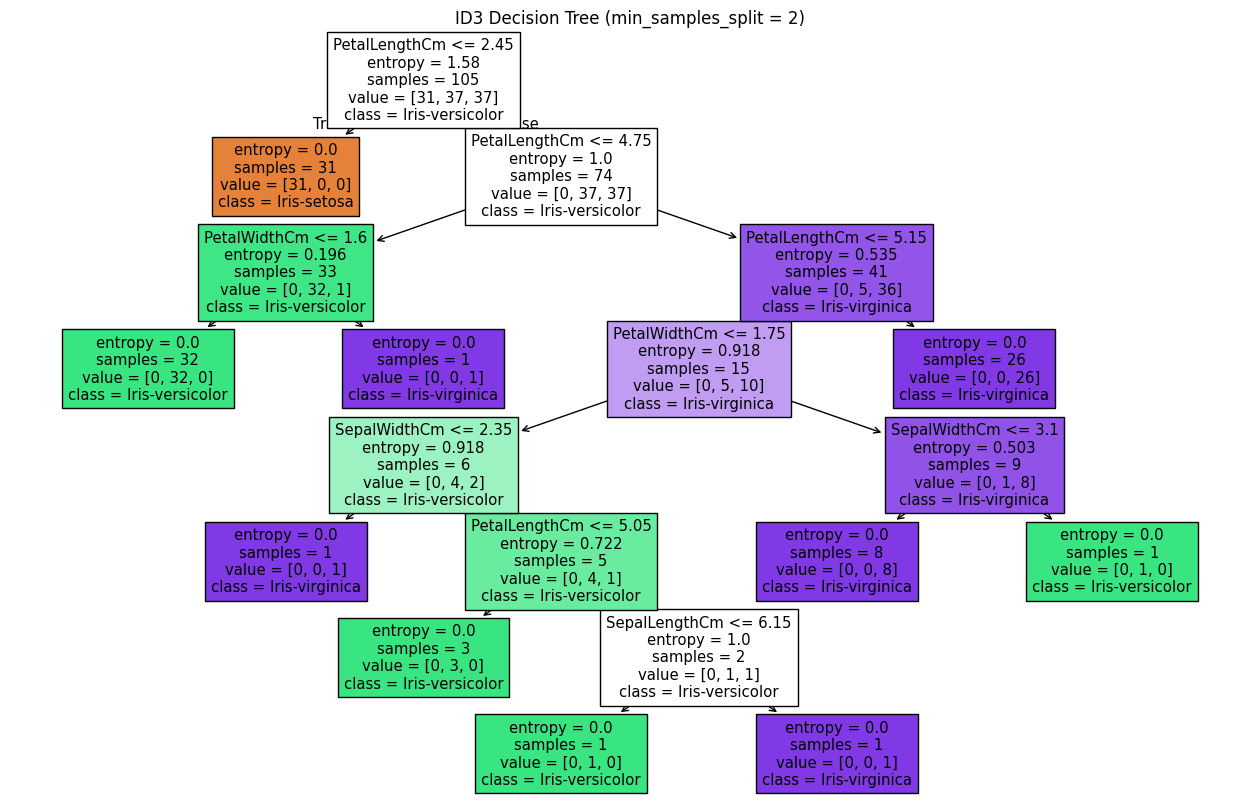

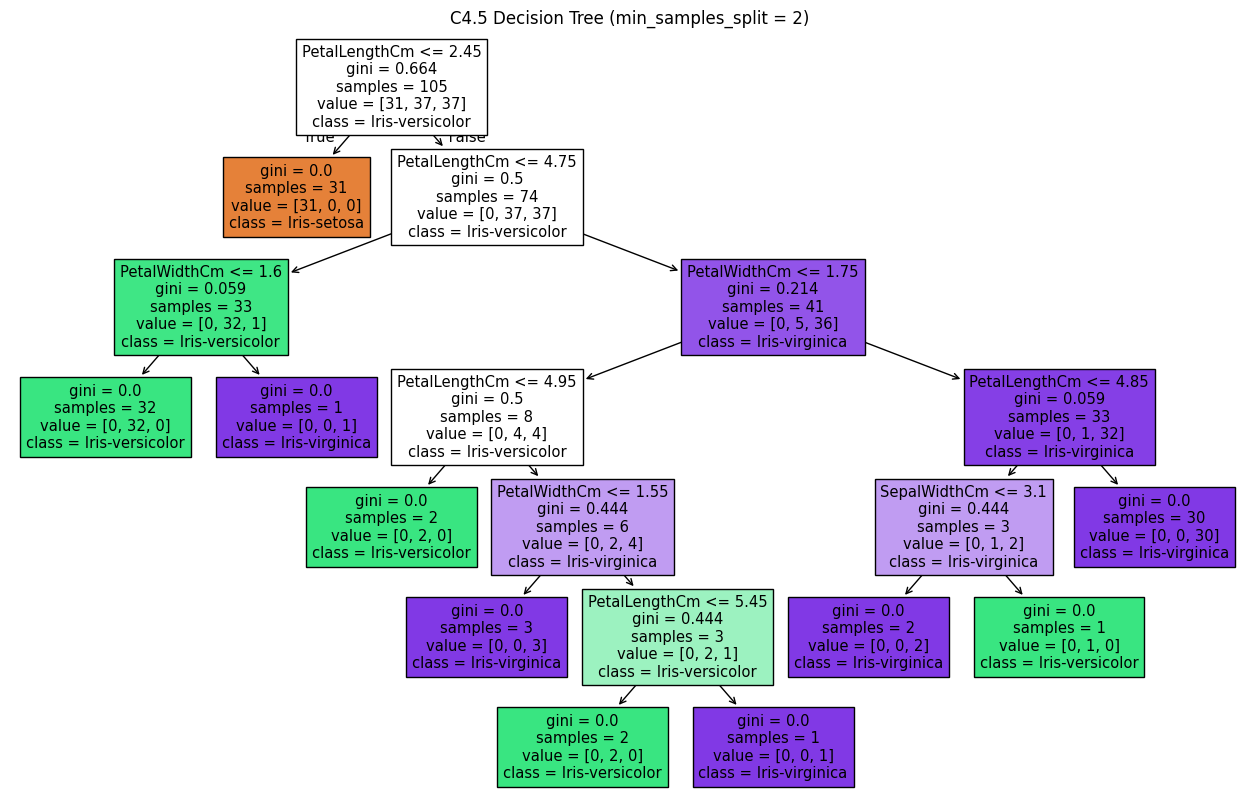

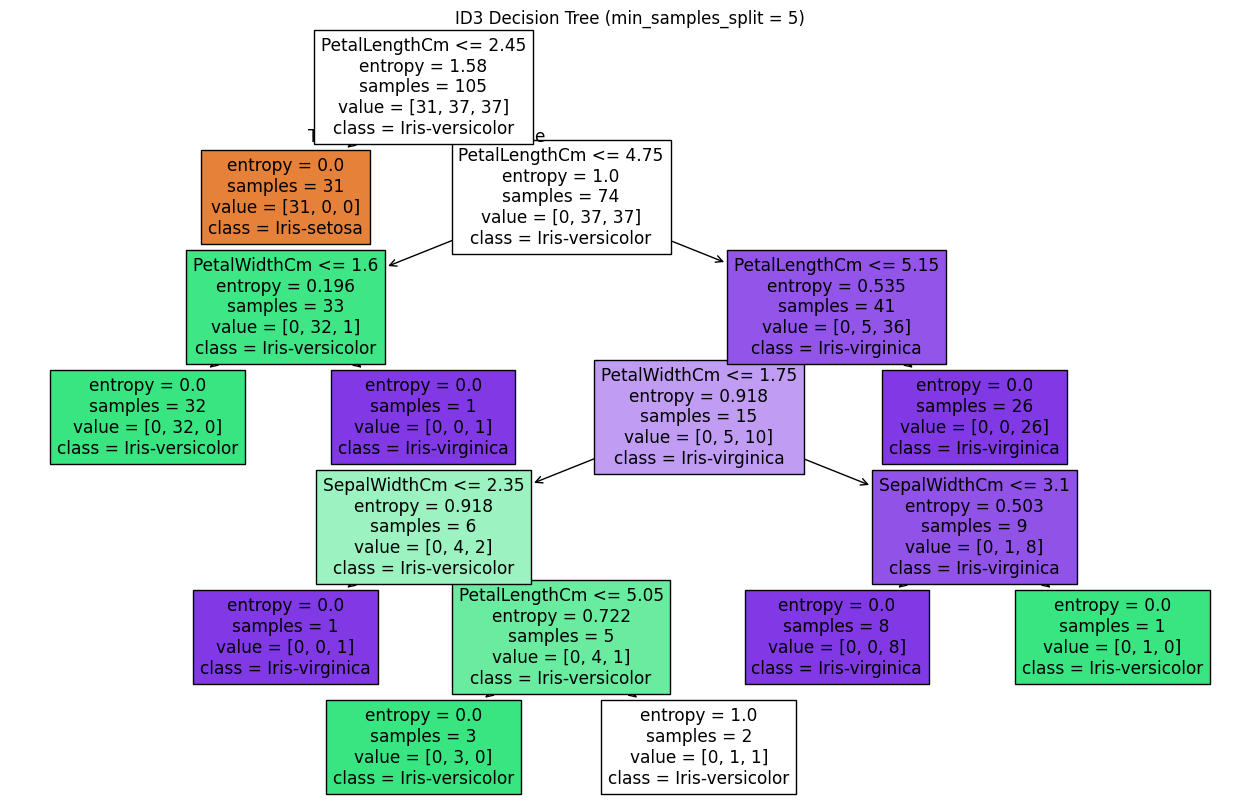

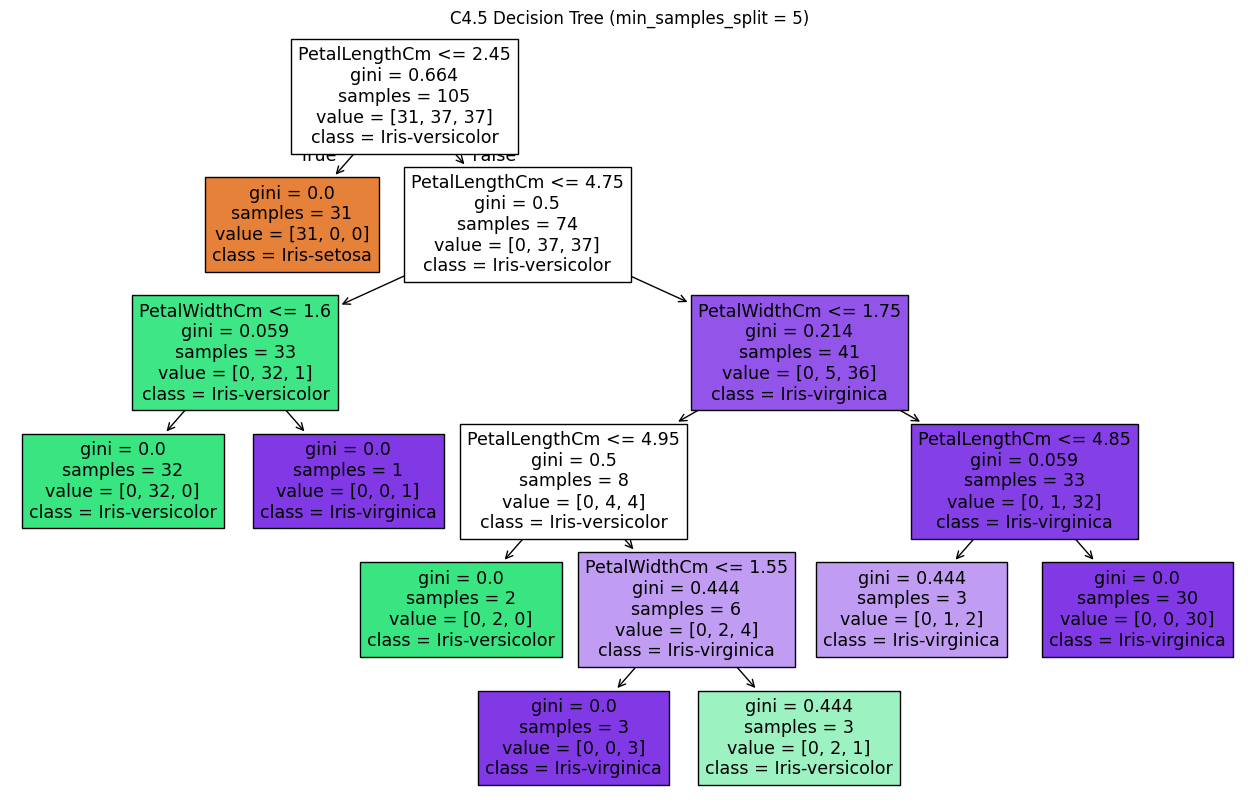

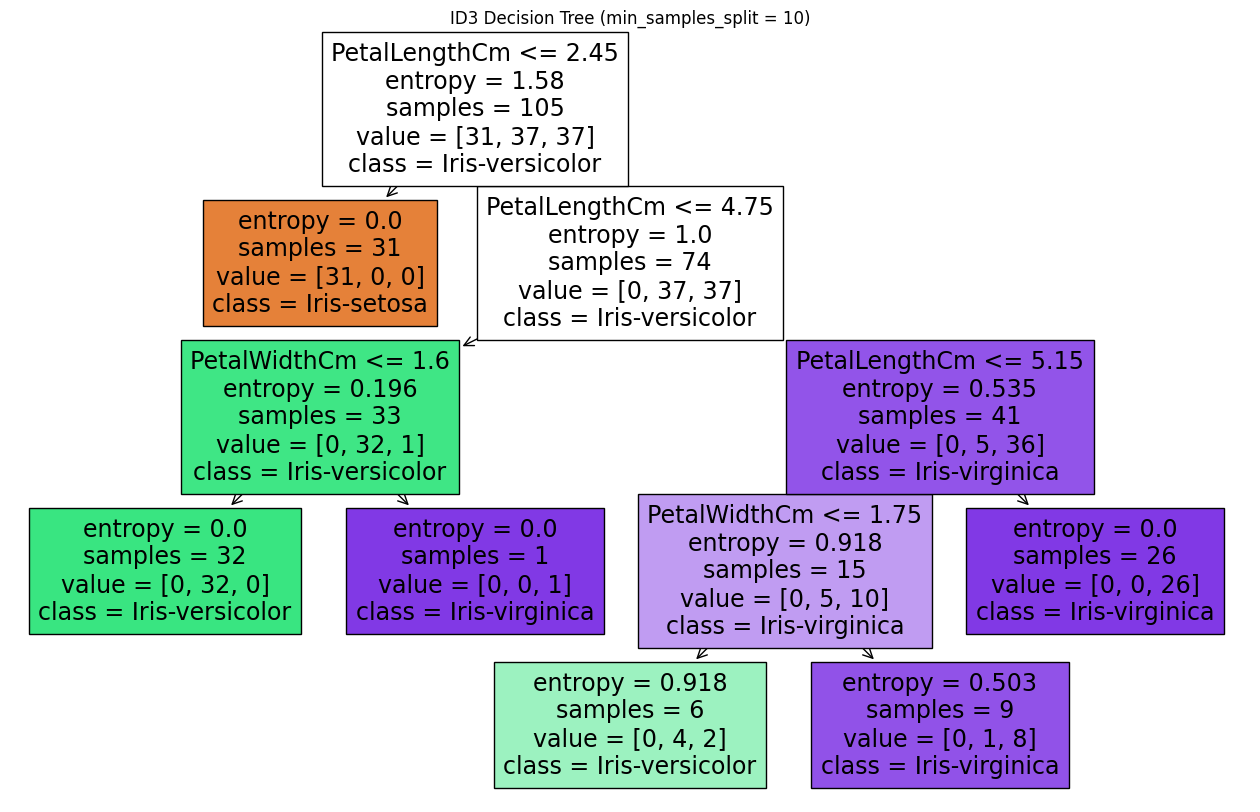

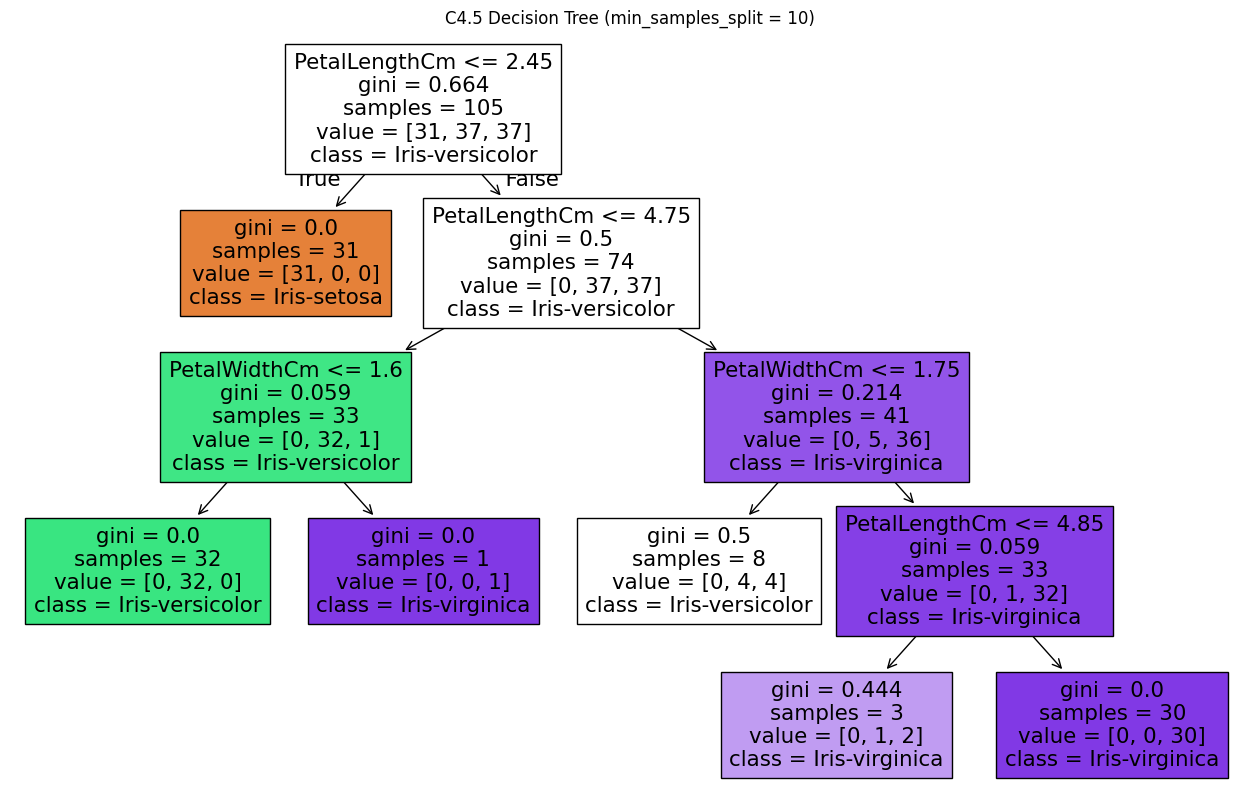

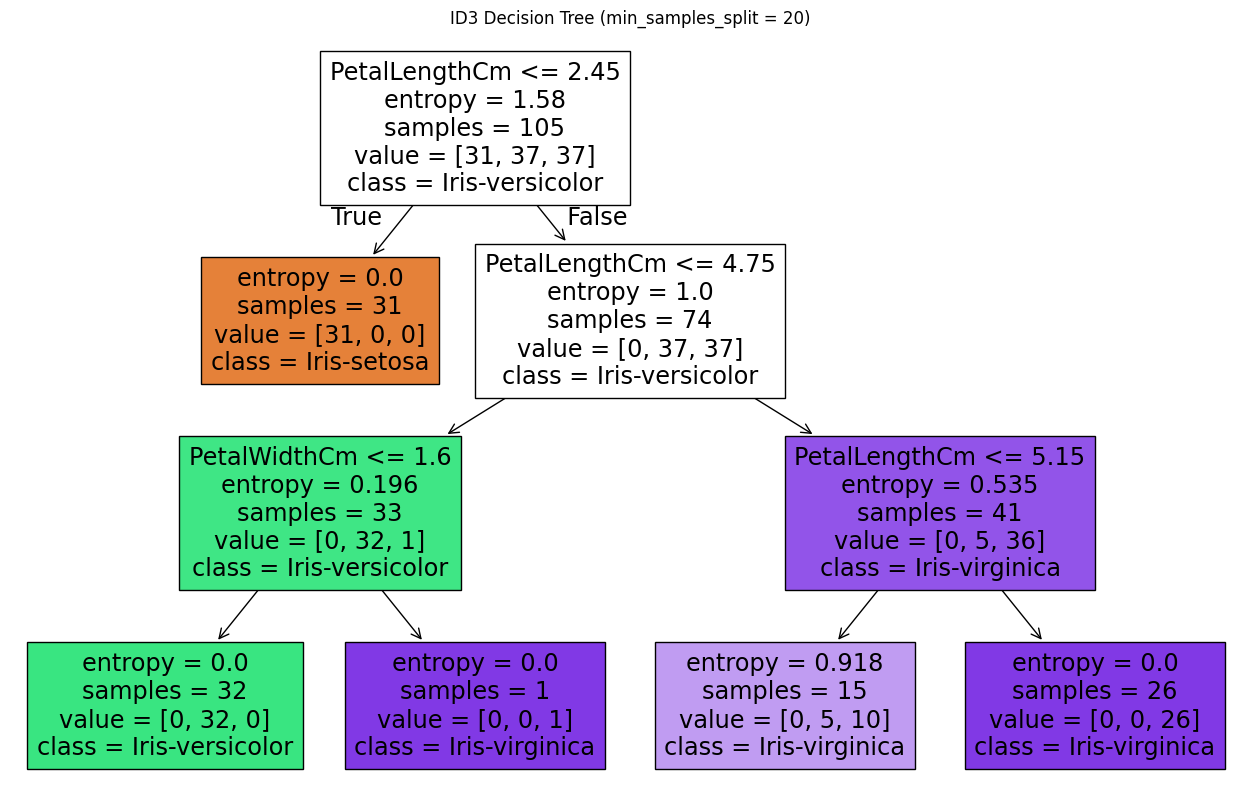

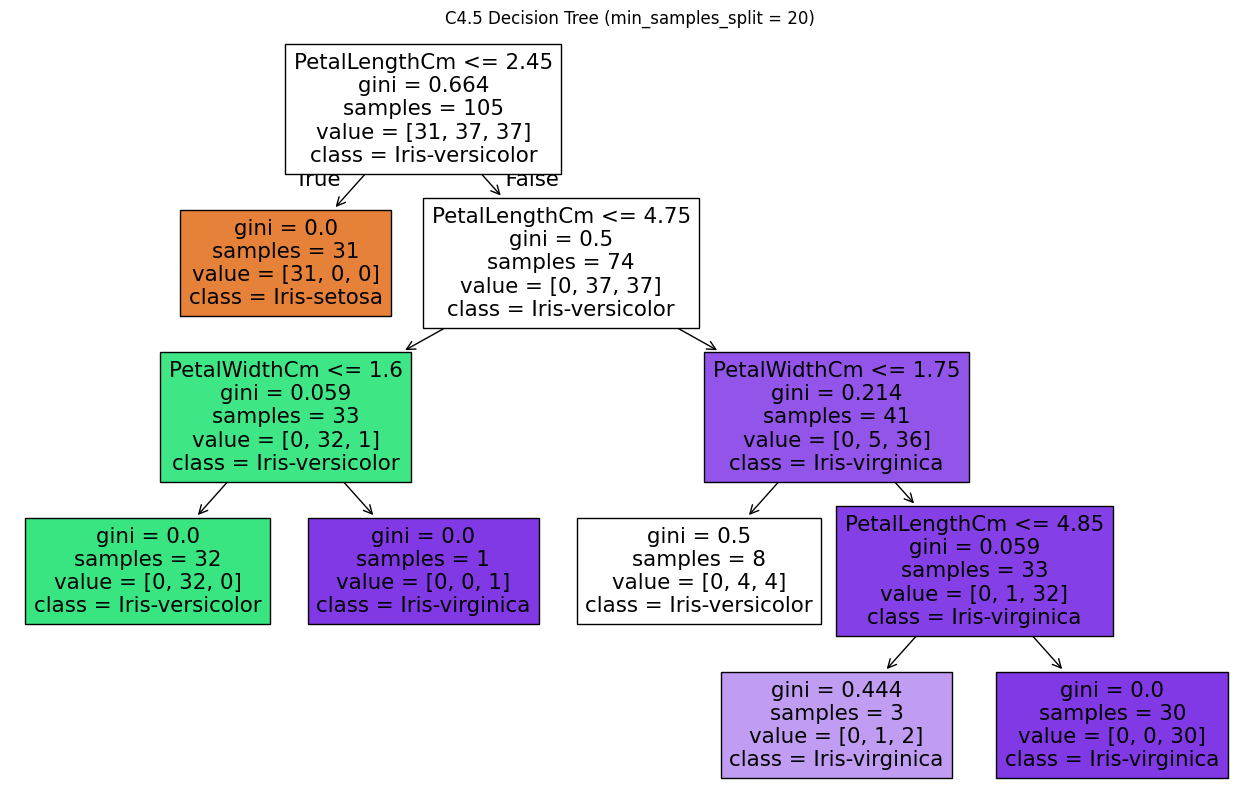

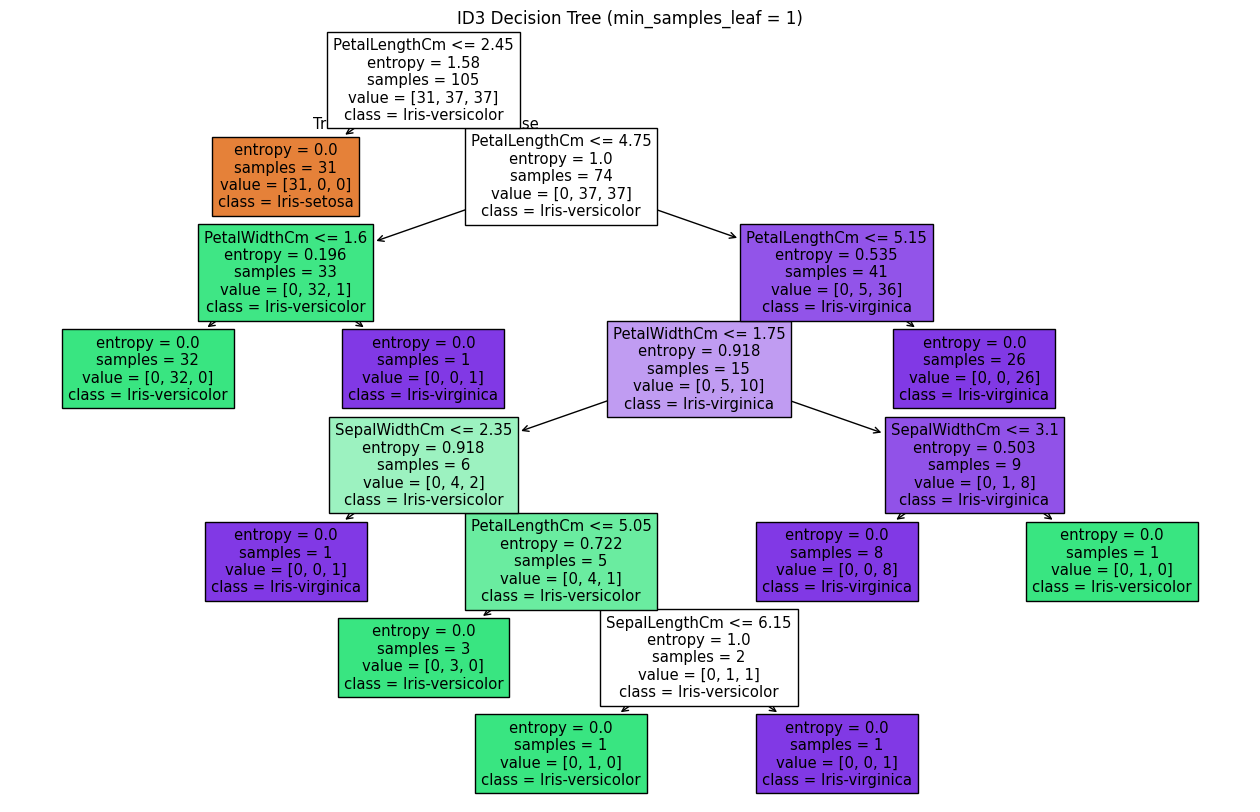

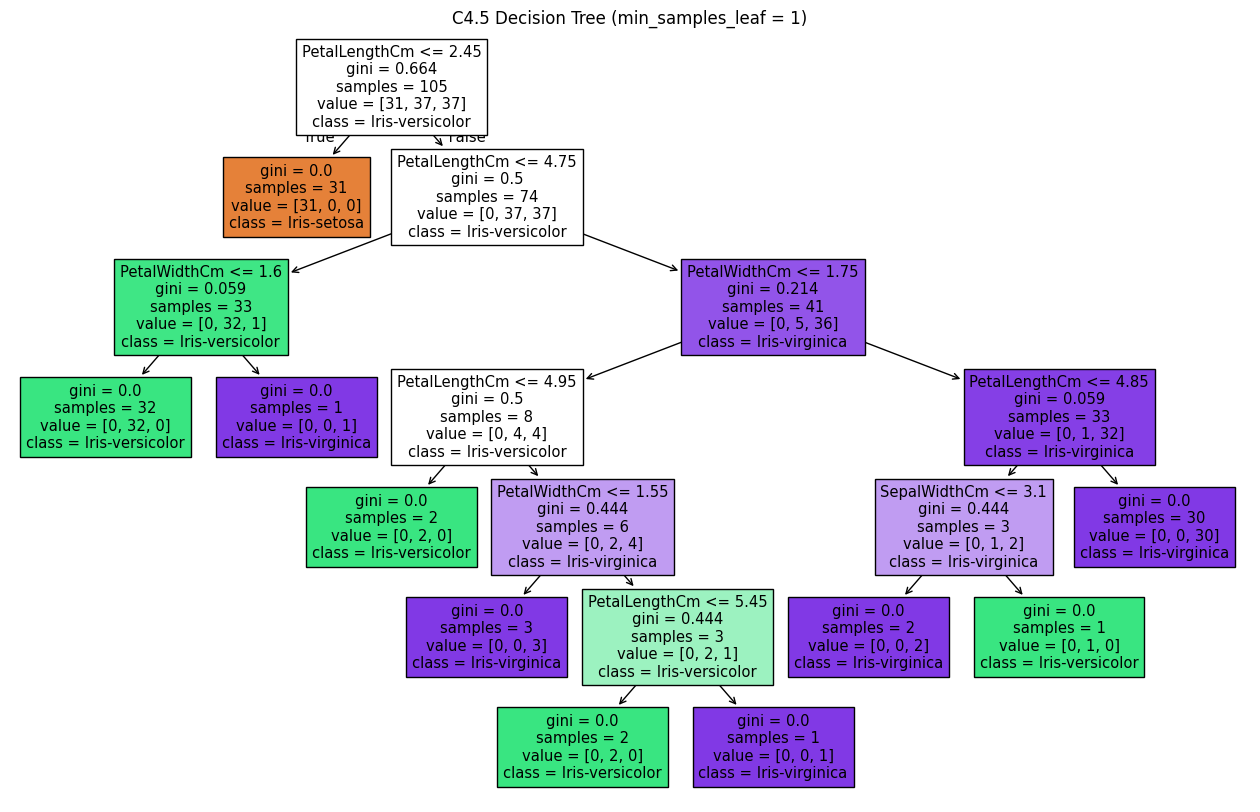

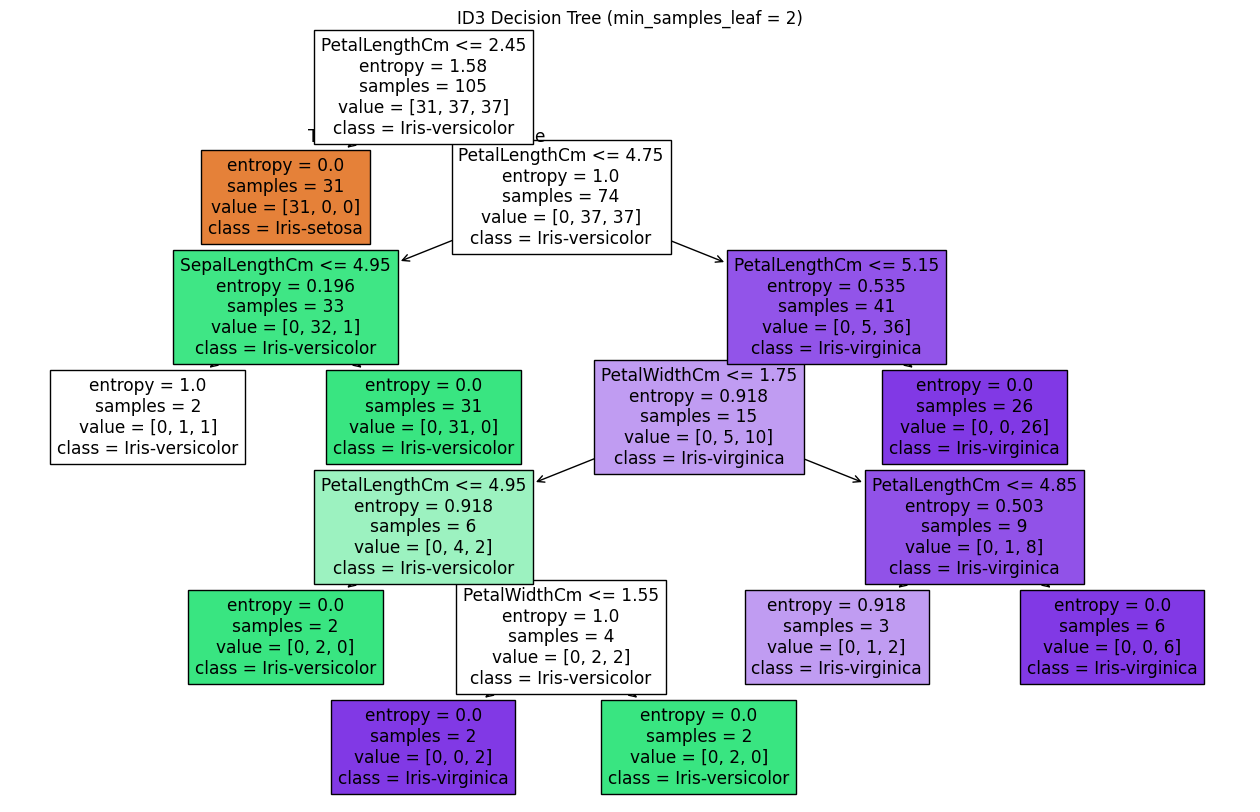

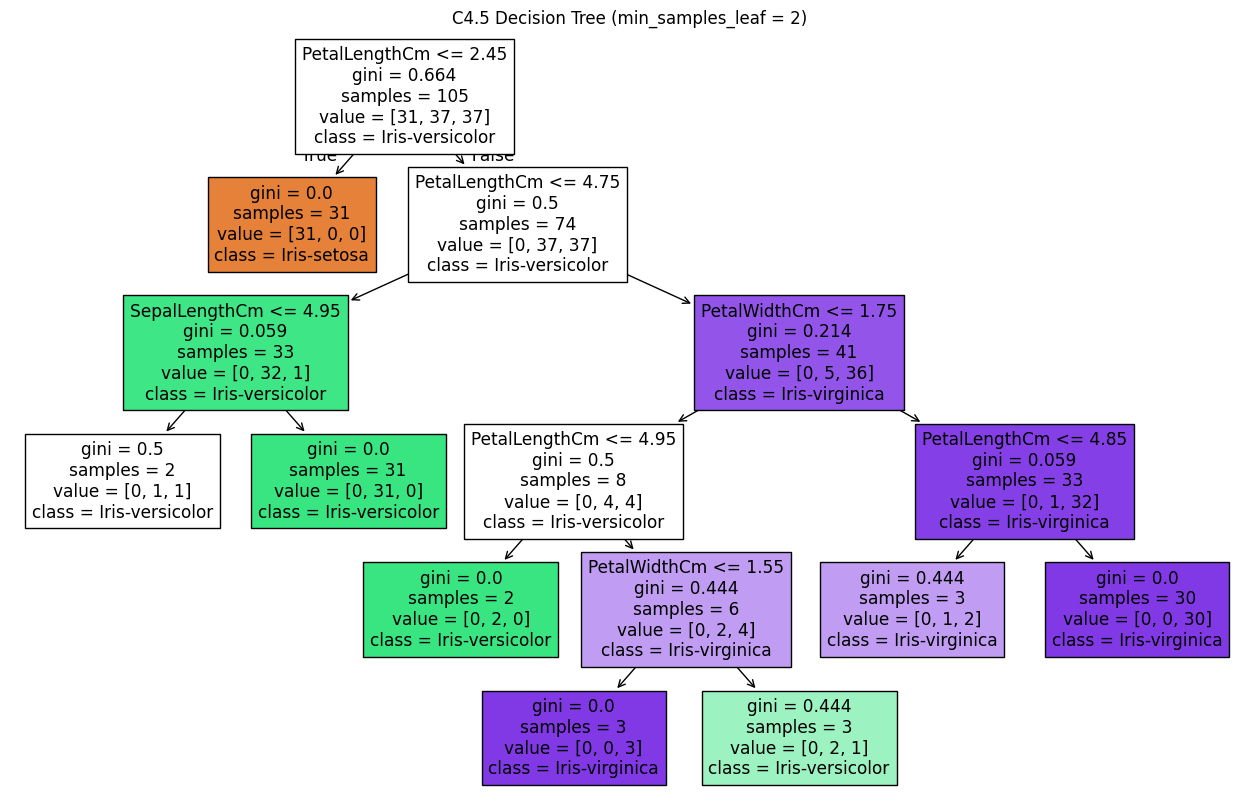

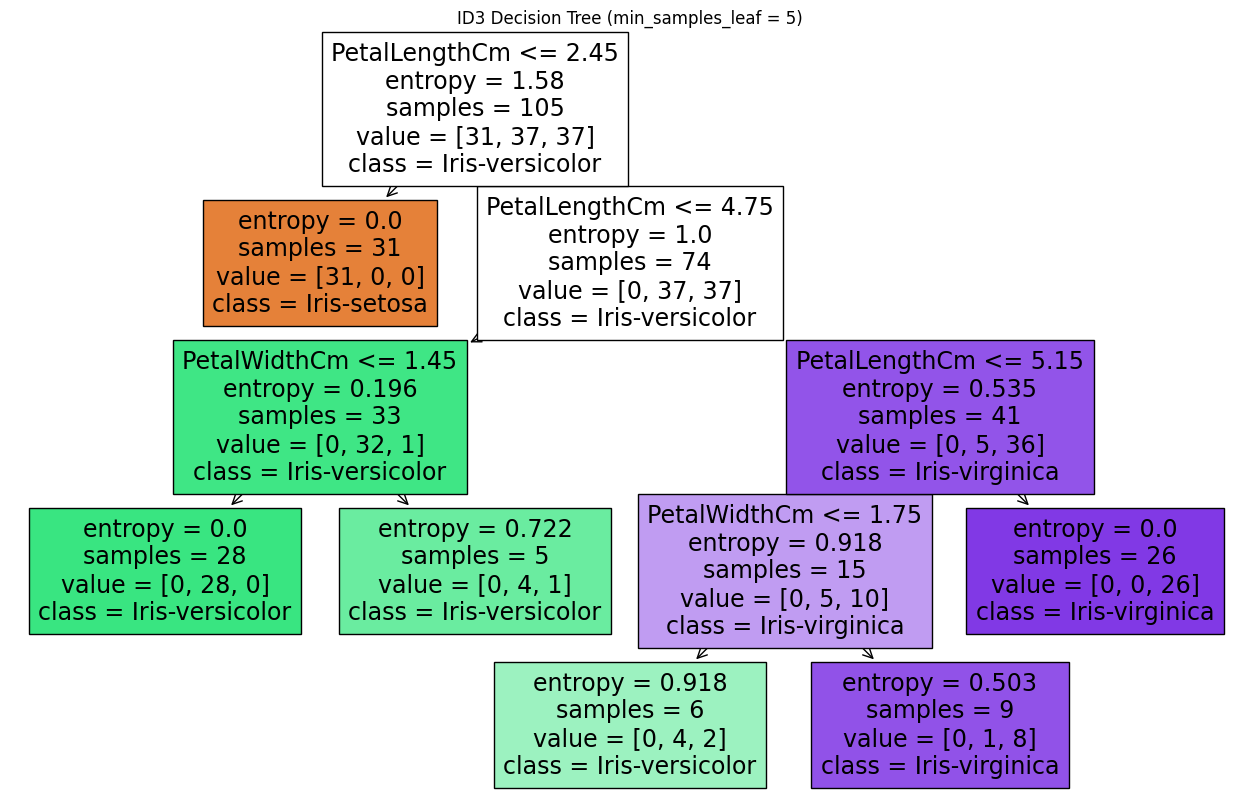

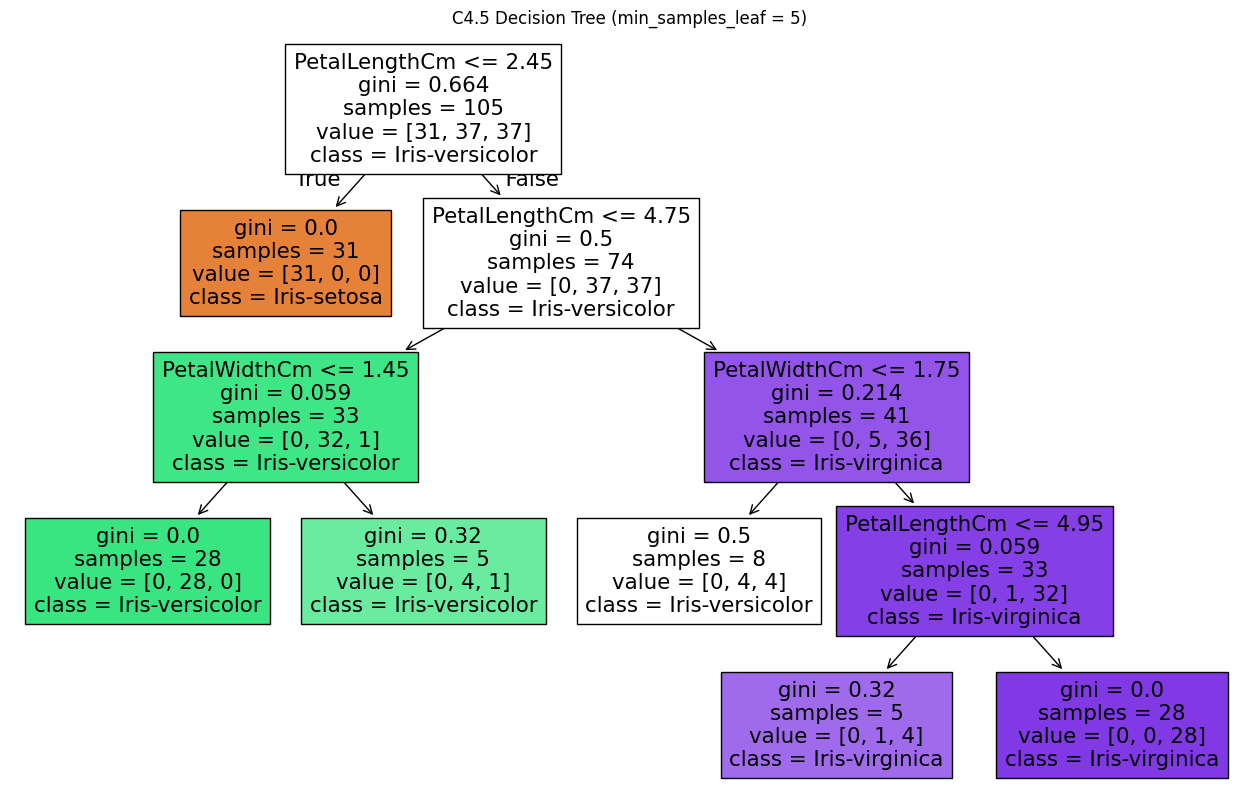

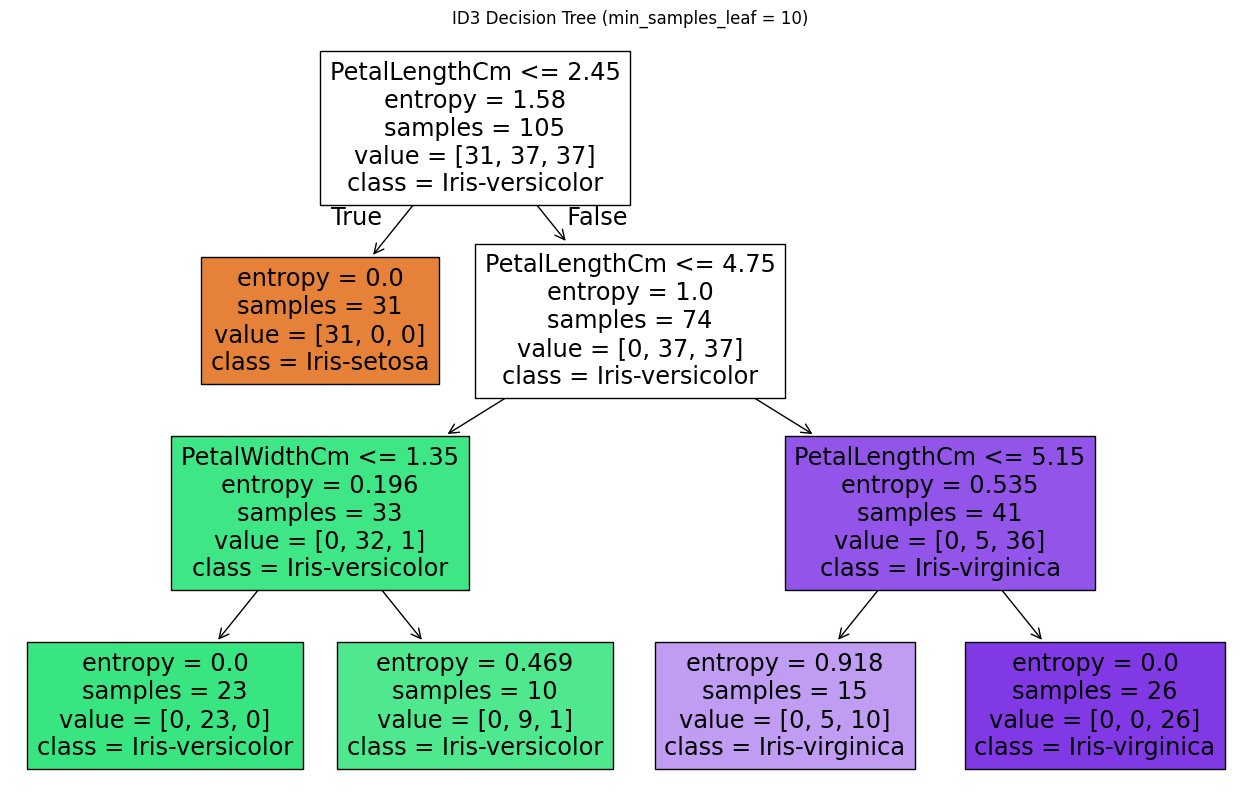

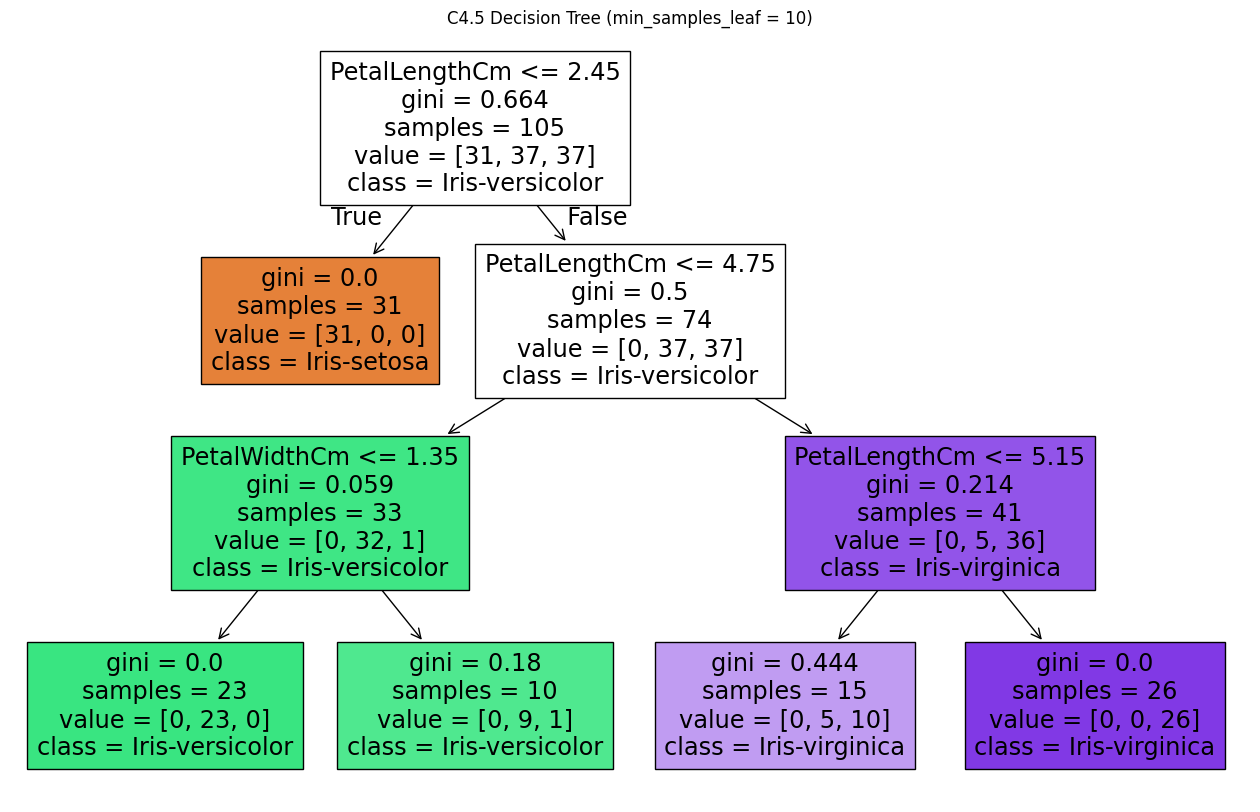

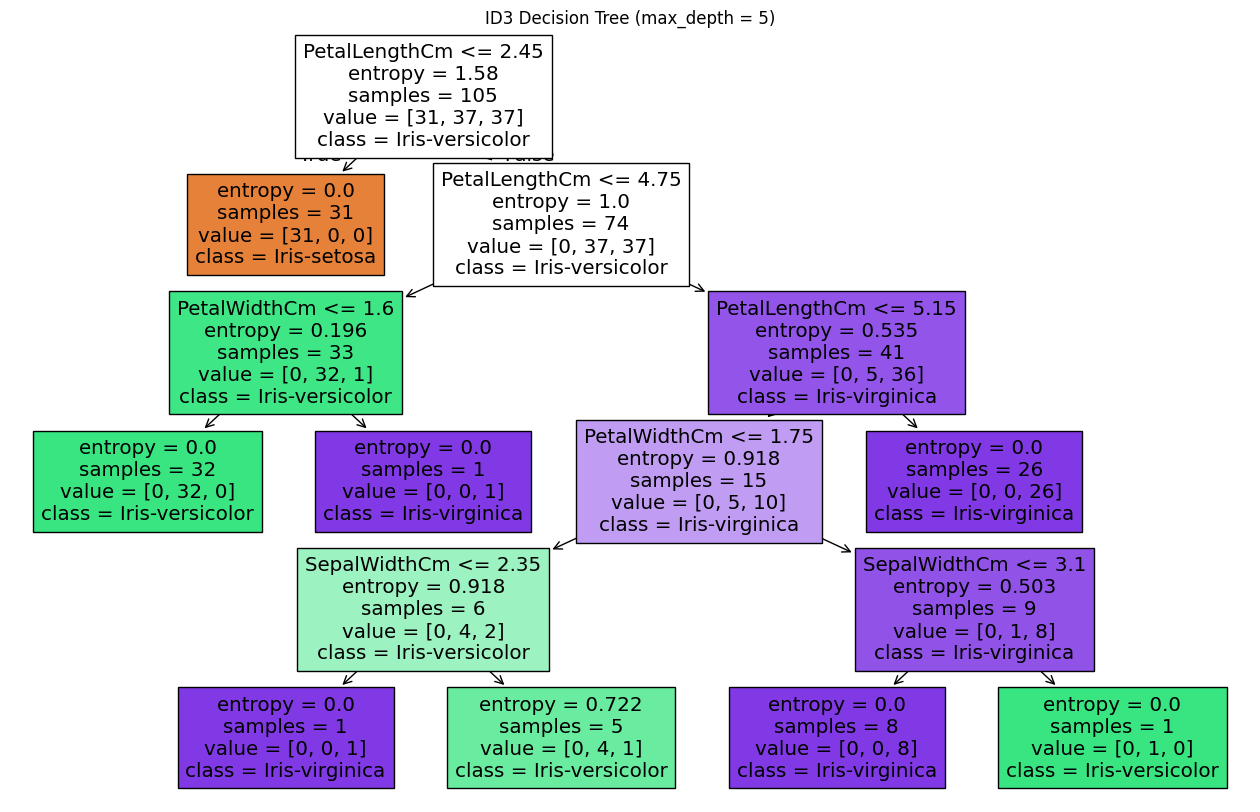

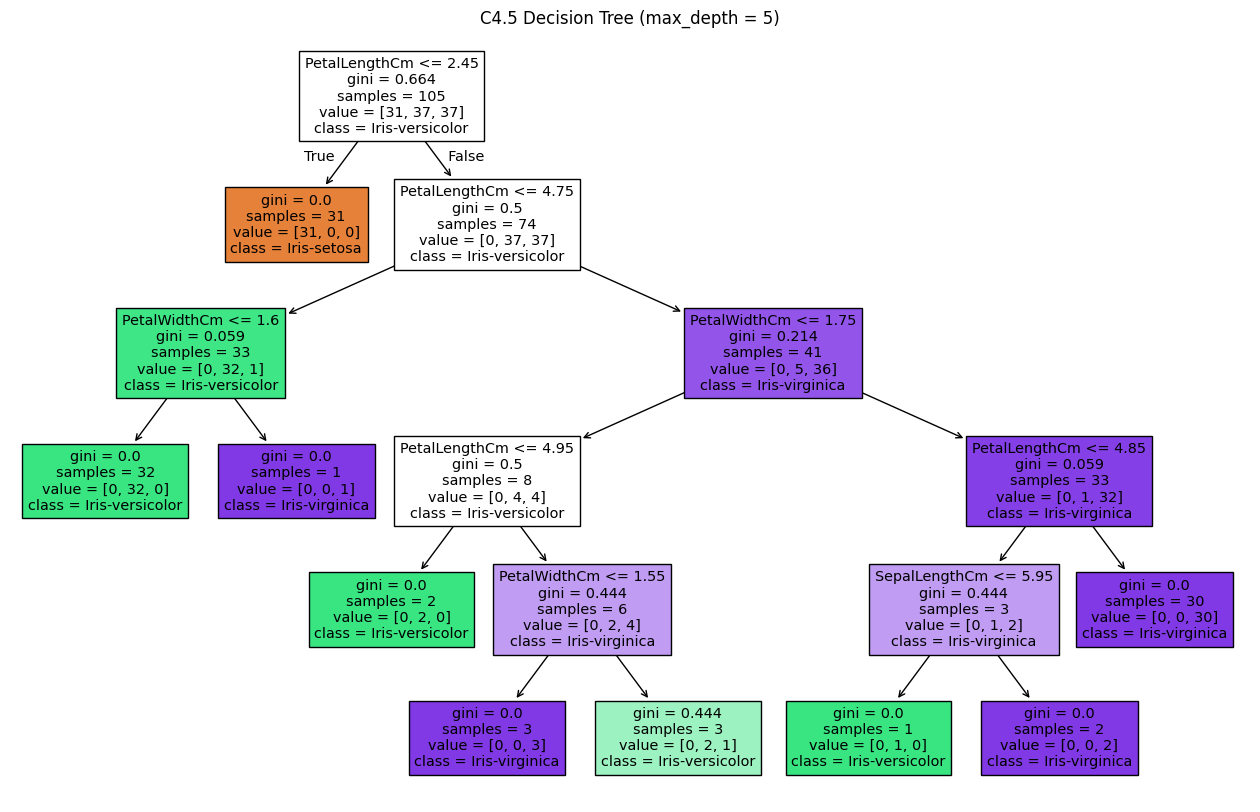

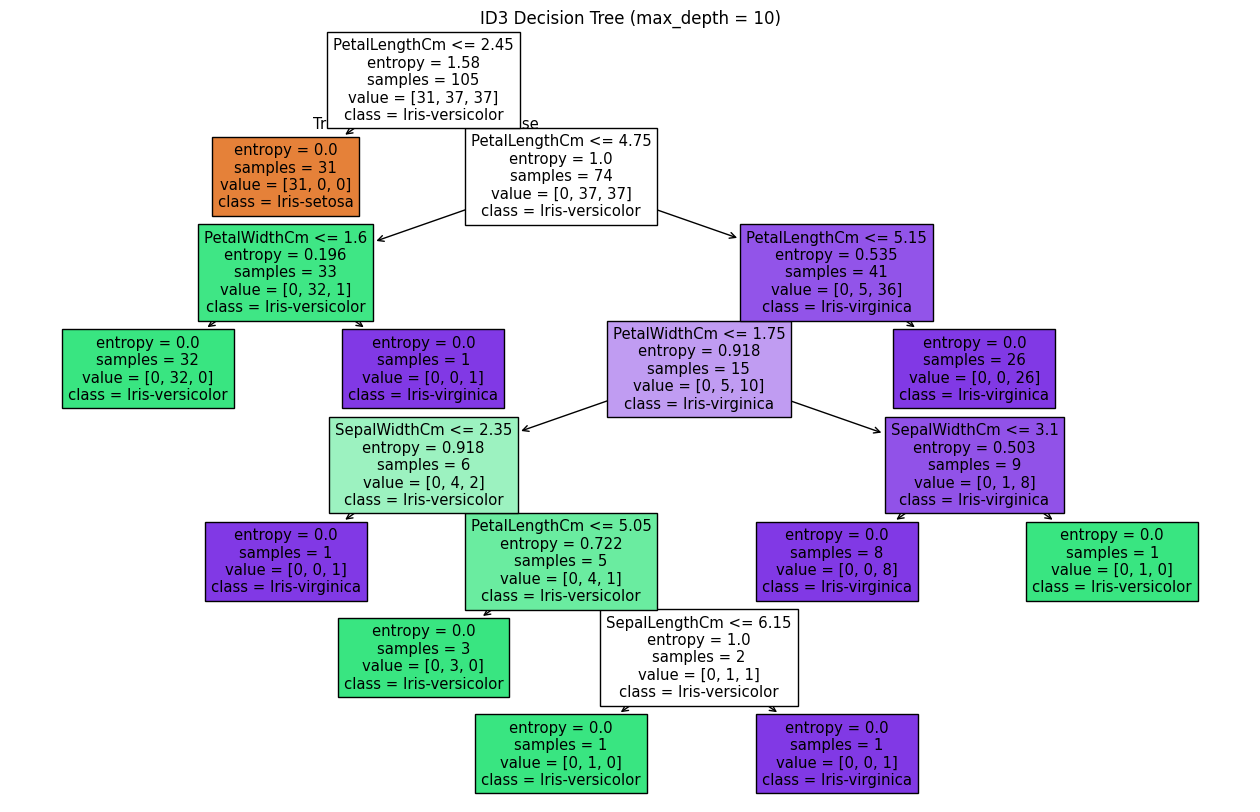

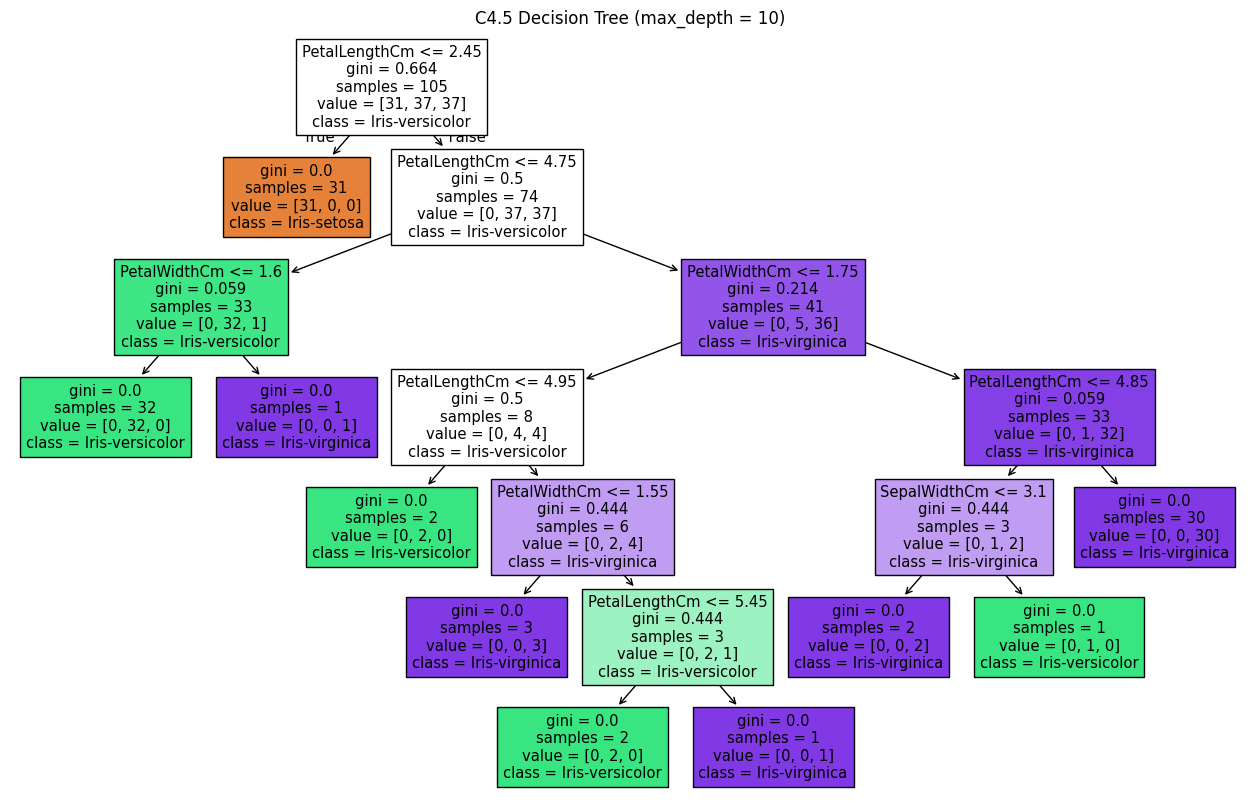

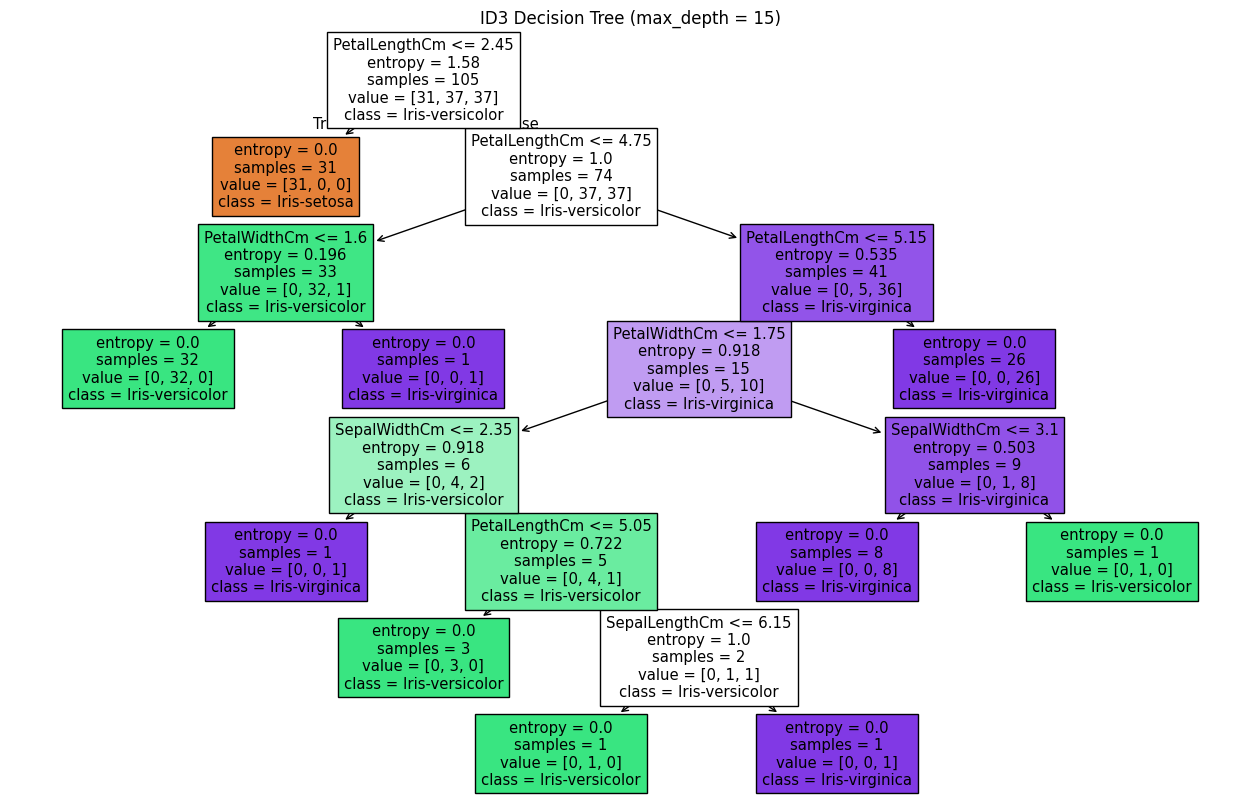

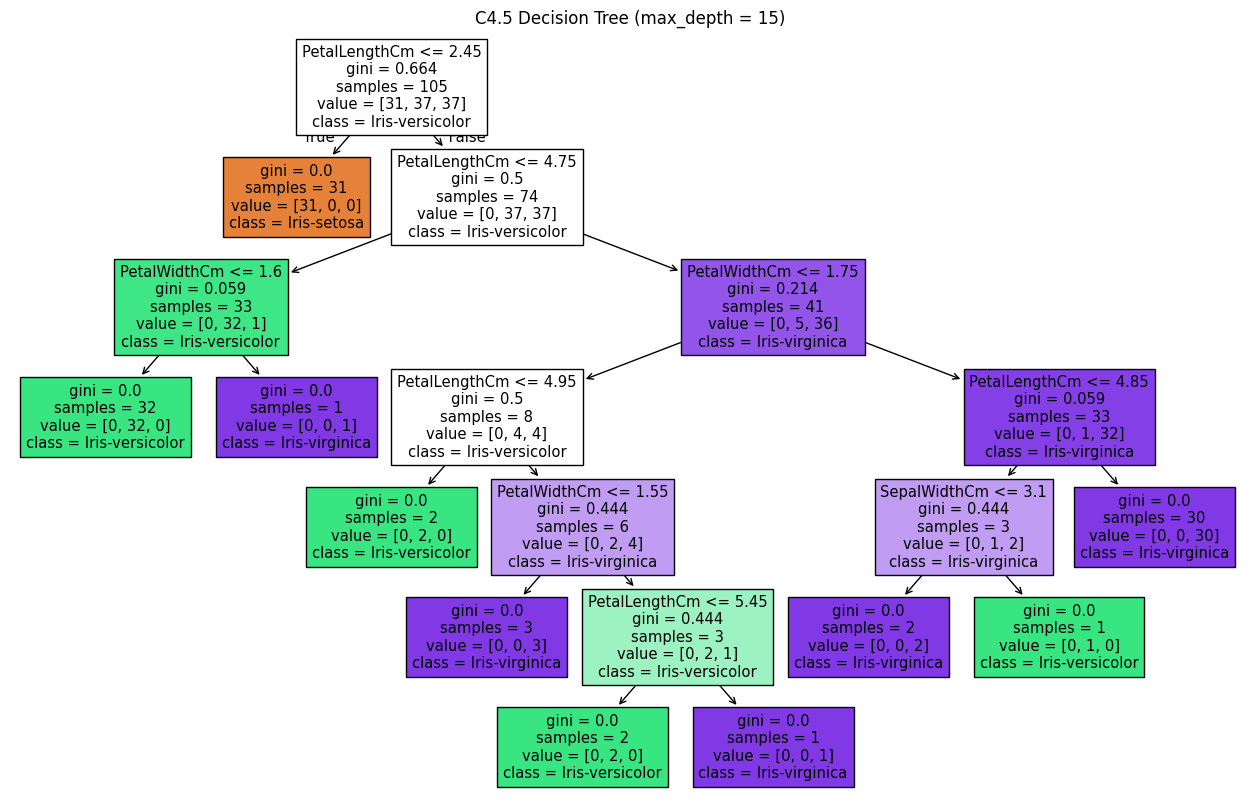

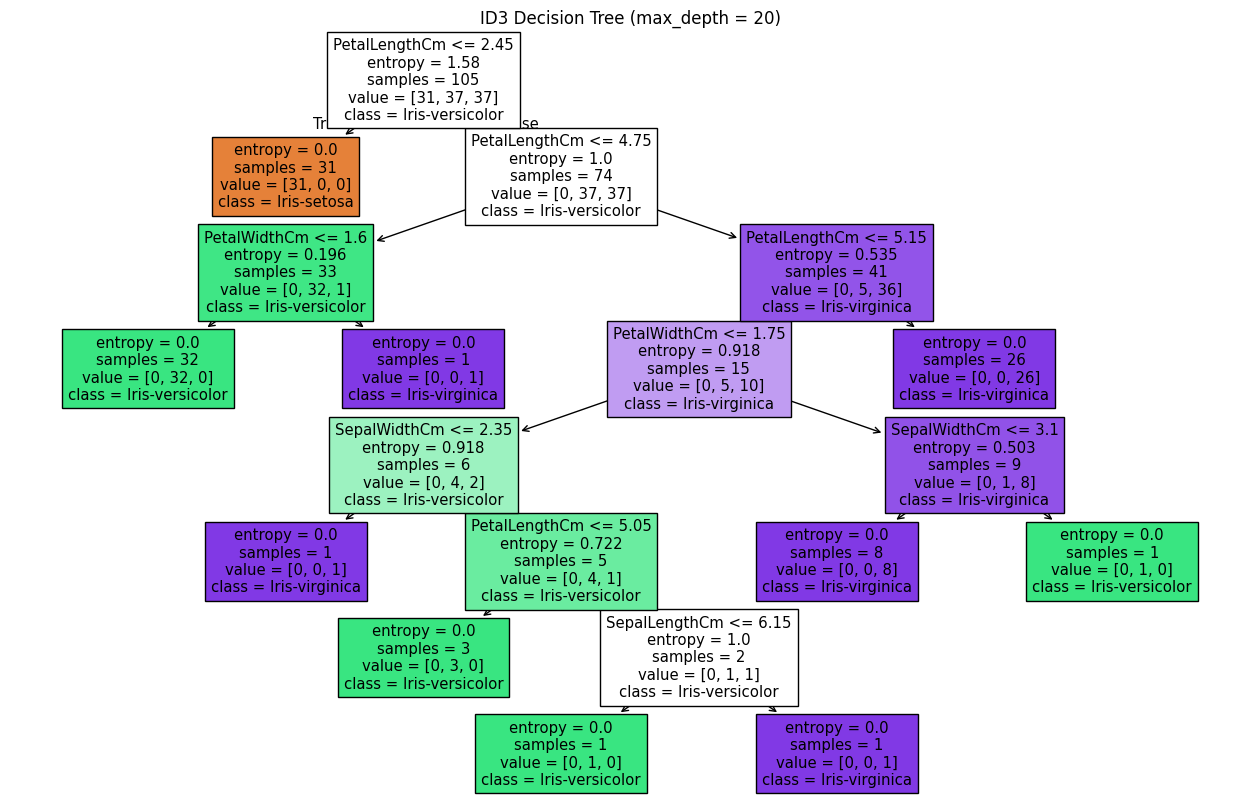

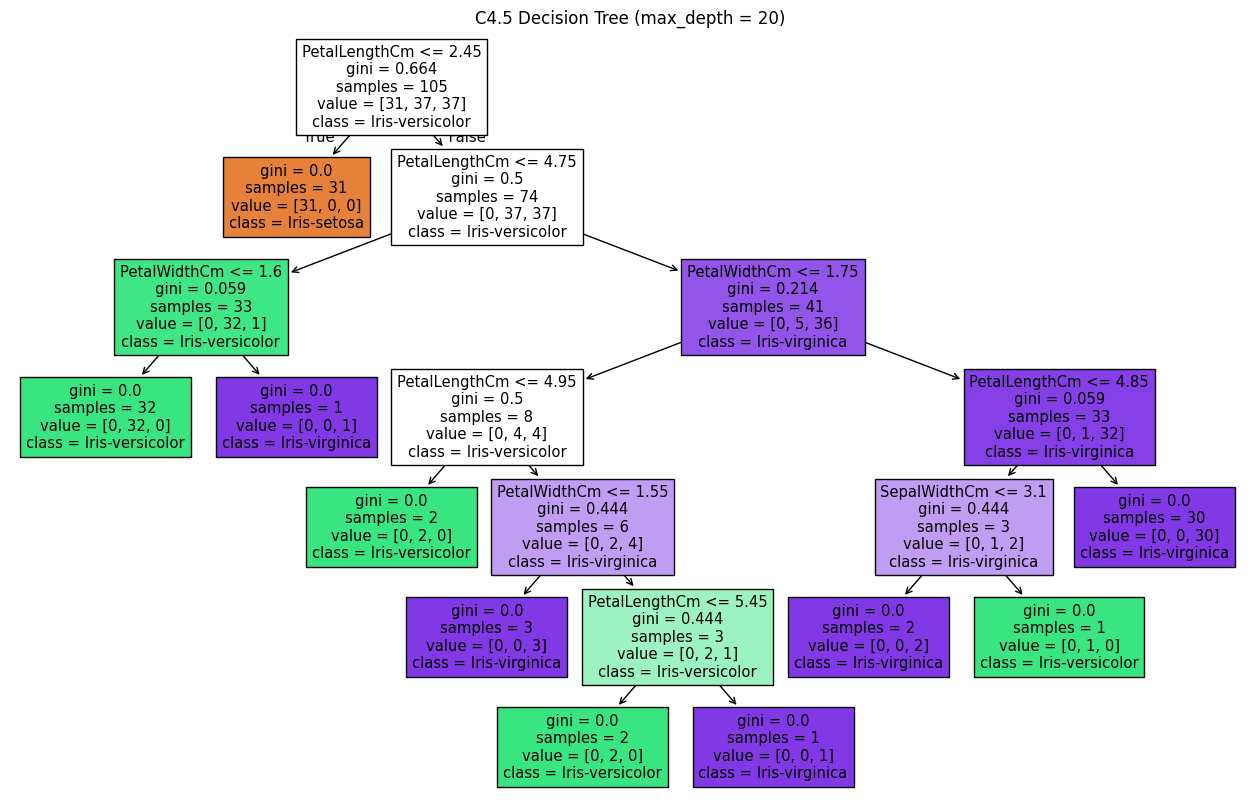

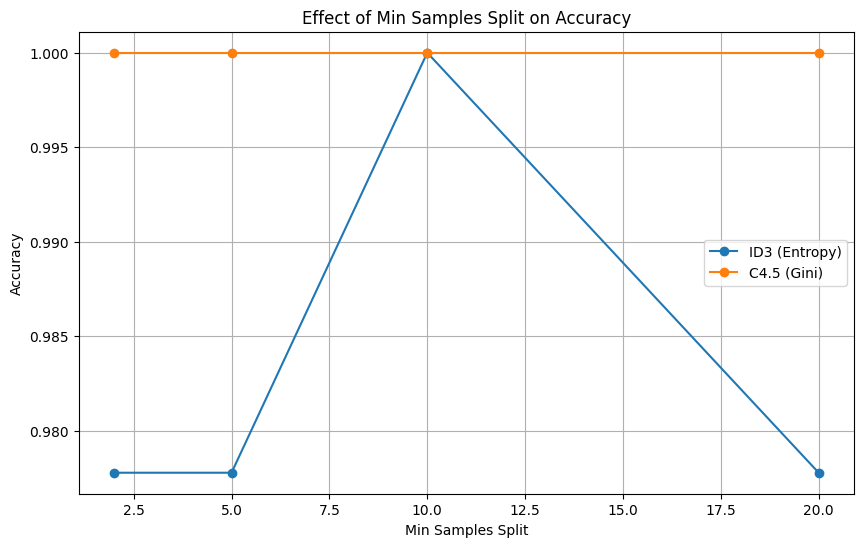

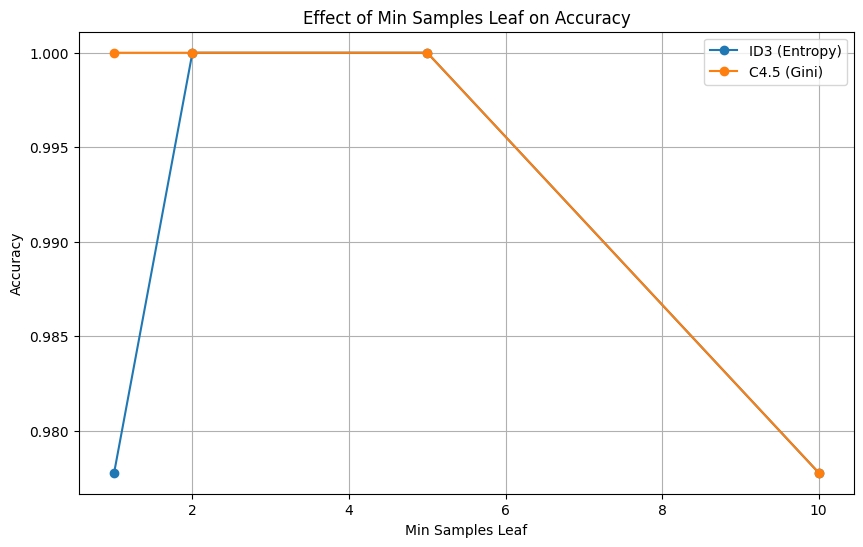

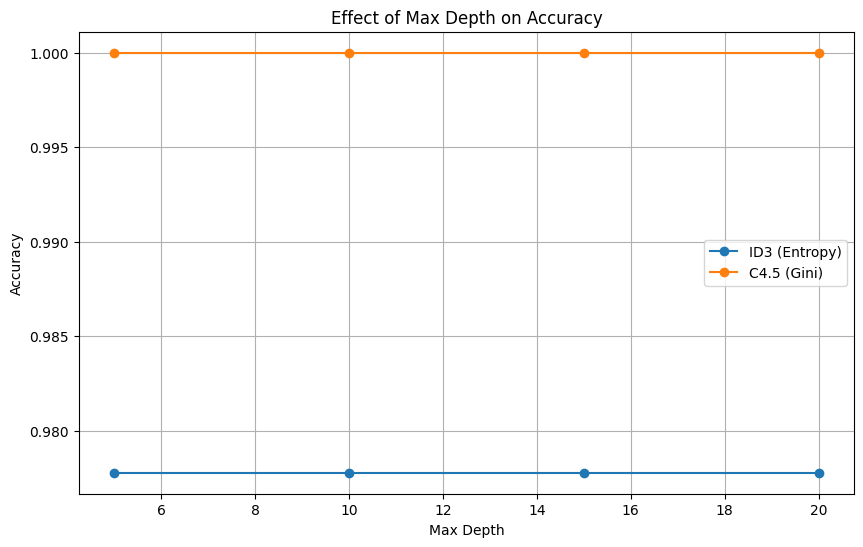

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/ML/Iris.csv')


label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])

X = df.iloc[:, 1:-1]
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


def evaluate_model_id3(parameter_name, parameter_value):
    model = DecisionTreeClassifier(criterion='entropy', **{parameter_name: parameter_value}, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    plt.figure(figsize=(16, 10))
    plot_tree(model, feature_names=df.columns[1:-1], class_names=label_encoder.classes_, filled=True)
    plt.title(f"ID3 Decision Tree ({parameter_name} = {parameter_value})")

    return accuracy_score(y_test, y_pred)


def evaluate_model_c45(parameter_name, parameter_value):
    model = DecisionTreeClassifier(criterion='gini', **{parameter_name: parameter_value},splitter='best',random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    plt.figure(figsize=(16, 10))
    plot_tree(model, feature_names=df.columns[1:-1], class_names=label_encoder.classes_, filled=True)
    plt.title(f"C4.5 Decision Tree ({parameter_name} = {parameter_value})")

    return accuracy_score(y_test, y_pred)

##################  VALUES TO TEST ###########
min_samples_splits = [2, 5, 10, 20]
min_samples_leaves = [1, 2, 5, 10]
max_depths = [5, 10, 15, 20]

values_to_try = {
    'min_samples_split': min_samples_splits,
    'min_samples_leaf': min_samples_leaves,
    'max_depth': max_depths
}

#RESULTS
accuracy_id3 = []
accuracy_c45 = []

#LOOP FOR TRYING ALL THE VALUES ON THE SKLEARN MODEL
for parameter_name, parameter_values in values_to_try.items():
    print(f"\nEvaluating parameter: {parameter_name}")

    results_id3 = []
    results_c45 = []

    for value in parameter_values:
        acc_id3 = evaluate_model_id3(parameter_name, value)
        acc_c45 = evaluate_model_c45(parameter_name, value)

        results_id3.append(acc_id3)
        results_c45.append(acc_c45)

        print(f"{parameter_name} = {value} -> ID3 Accuracy: {acc_id3}, C4.5 Accuracy: {acc_c45}")

    accuracy_id3.append(results_id3)
    accuracy_c45.append(results_c45)




#PLOTTING THE VALUES
def plot_parameter_effects(parameter_name, title, index):
    plt.figure(figsize=(10,6))

    # Plot for ID3
    plt.plot(values_to_try[parameter_name], accuracy_id3[index], label='ID3 (Entropy)', marker='o')

    # Plot for C4.5
    plt.plot(values_to_try[parameter_name], accuracy_c45[index], label='C4.5 (Gini)', marker='o')

    plt.title(f'Effect of {title} on Accuracy')
    plt.xlabel(title)
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()


plot_parameter_effects('min_samples_split', 'Min Samples Split' ,0)
plot_parameter_effects('min_samples_leaf', 'Min Samples Leaf', 1)
plot_parameter_effects('max_depth', 'Max Depth', 2)

# RANDOM FINAL TREE MADE AND DISPLAYED WITH plot_tree
final_model_id3 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
final_model_id3.fit(X_train, y_train)

# plt.figure(figsize=(16, 10))
# plot_tree(final_model_id3, feature_names=df.columns[1:-1], class_names=label_encoder.classes_, filled=True)
# plt.title('ID3 Decision Tree (Max Depth = 5)')
plt.show()
